In [18]:
import pandas as pd

In [19]:
pwd

'/Users/tlevier/Desktop'

In [20]:
cd ..

/Users/tlevier


In [21]:
# cd means change working directory, and the ".." removes the last part of it

In [22]:
cd /Users/tlevier/Desktop

/Users/tlevier/Desktop


In [23]:
surveys_df = pd.read_csv("data/surveys.csv", keep_default_na = False, na_values = [''])
# don't keep default Na values, keep them as a (blank?) string
surveys_df.head()
# we see below that this is now incorrect

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [24]:
species_df = pd.read_csv('data/species.csv', keep_default_na = False, na_values = [''])
species_df.tail()
# this loads in the species dataframe that looks almost equivalent

,species_id,genus,species,taxa
49,UP,Pipilo,sp.,Bird
50,UR,Rodent,sp.,Rodent
51,US,Sparrow,sp.,Bird
52,ZL,Zonotrichia,leucophrys,Bird
53,ZM,Zenaida,macroura,Bird


In [25]:
# read in the first 10 lines of surveys_df
survey_sub = surveys_df.head(10)
# this way you just get the first 10 lines and don't have to worry about the indexing being correct

# grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)

In [26]:
survey_sub

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [27]:
survey_sub_last10
# you notice the index values are super high and we don't necessarily want that
# we will now reset them since there can be issues combining them with other lines when they have these crazy high values

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35539,35540,12,31,2002,15,PB,F,26.0,23.0
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [28]:
survey_sub_last10.reset_index(drop = True, inplace = True)
# drop = True because we want to get rid of the original index
survey_sub_last10.head()
# this is how we can verify that the index has been reset

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,35540,12,31,2002,15,PB,F,26.0,23.0
1,35541,12,31,2002,15,PB,F,24.0,31.0
2,35542,12,31,2002,15,PB,F,26.0,29.0
3,35543,12,31,2002,15,PB,F,27.0,34.0
4,35544,12,31,2002,15,US,NaN,NaN,NaN


In [29]:
# stack the two dataframes on top of each other
# using concat which is short for concatenate
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis = 0)

In [30]:
vertical_stack
# this is all 20 of the rows combined, one data frame of 20 instead of two of 10

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [31]:
# whenever you concatenate, the next thing you should do is immediately reset the index so that it is not confusing
# write out the new dataframe
vertical_stack.to_csv('data_output/vertical_stack.csv', index = False)
# always reset the index!! super important

In [32]:
new_output = pd.read_csv('data_output/vertical_stack.csv')
# will now compulsively check that it looks right
new_output.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [33]:
len(new_output)
# all of this is how you concatenate data vertically
# can also run new_output to confirm there are 20 rows (going from 0 to 19)

20

# Challenge

In the data folder, there are two survey data files: surveys2001.csv and surveys2002.csv. Read the data into Python and combine the files to make one new data frame. Create a plot of average plot weight by year grouped by sex. Export your results as a CSV and make sure it reads back into Python properly.

In [34]:
# My attempt
surveys_2001 = pd.read_csv("data/surveys2001.csv")
surveys_2002 = pd.read_csv("data/surveys2002.csv")

concatchallenge = pd.concat([surveys_2001, surveys_2002], axis = 0)
concatchallenge.to_csv('data_output/concatchallenge.csv', index = False)

new_outputchallenge = pd.read_csv('data_output/concatchallenge.csv')


In [35]:
concatchallenge

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0
2,31712,31713,1,21,2001,1,PB,M,29.0,44.0
3,31713,31714,1,21,2001,1,DO,M,34.0,53.0
4,31714,31715,1,21,2001,2,OT,M,20.0,27.0
...,...,...,...,...,...,...,...,...,...,...
2073,35540,35541,12,31,2002,15,PB,F,24.0,31.0
2074,35541,35542,12,31,2002,15,PB,F,26.0,29.0
2075,35542,35543,12,31,2002,15,PB,F,27.0,34.0
2076,35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [36]:
new_outputchallenge

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0
2,31712,31713,1,21,2001,1,PB,M,29.0,44.0
3,31713,31714,1,21,2001,1,DO,M,34.0,53.0
4,31714,31715,1,21,2001,2,OT,M,20.0,27.0
...,...,...,...,...,...,...,...,...,...,...
3507,35540,35541,12,31,2002,15,PB,F,24.0,31.0
3508,35541,35542,12,31,2002,15,PB,F,26.0,29.0
3509,35542,35543,12,31,2002,15,PB,F,27.0,34.0
3510,35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [37]:
new_outputchallenge.head()

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0
2,31712,31713,1,21,2001,1,PB,M,29.0,44.0
3,31713,31714,1,21,2001,1,DO,M,34.0,53.0
4,31714,31715,1,21,2001,2,OT,M,20.0,27.0


In [38]:
len(new_outputchallenge)

3512

# Concat example / Day 2 Review

In [39]:
# Vertical concatenation, axis = 0

# batch 1 = pd.read_csv()
# batch 2 = pd.read_csv
# pd.concat([batch1, batch 2], axis = 0).reset_index(drop = True)

# you can also put help around everything above except drop = True to know what the arguments are

In [40]:
# Horizonal concatenation, axis = 1

# seth = pd.read_csv()
# kristi = pd.read_csv()

# pd.concat([seth, kristi], axis = 1)

# pd.concat([seth, kristi.weight], axis = 1)
    # maybe this is if you want just weight from kristi's data set?

# seth.set_index("record_id", inplace = True)
    # this makes the record id variable the new index numbers which is a more natural way of working with this data
    
# seth.columns 
    # to see column names

# seth.index (?)
    # to see the new indexing numbers
    
# df = pd.concat([seth, kristi], axis = 1)
# df
    # to see the new cleaner data
    
# df.loc[64,t]
    # this runs since it is within the index

# df.loc[62,t]
    # this gets an error message because it isn't within the index values (which go from 63 to 67)
    

# kristi = pd.read_csv()

# Challenge (their version)

nvm this looks like something new

In [41]:
# read in the first 10 lines of surveys table
surveys_sub = surveys_df.head(10)

#import a small subset of the species data
species_sub = pd.read_csv('data/speciesSubset.csv',
                         keep_default_na = False,
                         na_values = [''])
species_sub.head()

,species_id,genus,species,taxa
0,DM,Dipodomys,merriami,Rodent
1,NL,Neotoma,albigula,Rodent
2,PE,Peromyscus,eremicus,Rodent


In [42]:
surveys_sub.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [43]:
species_sub.columns
# associated with each species_id it has the genus and species and taxa

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [44]:
merged_inner = pd.merge(left = survey_sub, 
                        right = species_sub,
                        left_on = 'species_id',
                        right_on = 'species_id')

merged_inner.shape
# whenever you are merging it has a concept of left and right, if you are doing an intermerge
# you have the value and ID field and discard anythign that doesn't have a match
# side note: can always indent after a comma within parenthesis and it will know to indent correctly
# when you indent again after closing the bracket, it will go back to the original spacing but if you didn't close the parenthesis
# it will continue with the indent and that way you can know to correct it

# if you don't tell it how = 'innner' for the merged_inner parenthesis, it will assume that it is the default anyways
# if you are actually looking for the inner, you only need to specify if it is other things like you will see below

(8, 12)

In [45]:
merged_inner
# now in addition to all survey subs with the weight, you can know the genus or species or taxa/ creature type 
# associated with each row and species_id has not changed at all
# only has 8 rows despite starting at 8 because we threw out everything that didn't match with the subbed(?) data

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


In [46]:
merged_left = pd.merge(left = survey_sub,
                      right = species_sub,
                      how = 'left',
                      left_on = 'species_id',
                      right_on = 'species_id')
merged_left.shape
# have a slightly different shape, but it is now on the left instead of on the inner
# see here how we have to include how = 'left', this is because you are not looking for the default inner section

# basically this is the same as above it just doesn't throw out values on the left data frame that don't match

(10, 12)

In [47]:
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


In [48]:
merged_left[pd.isnull(merged_left['genus'])]
# this is to look at which cases in merged_left where the merge resulted in na's
# because it was a left merge it kept these in the data frame, but for inner merge it would be thrown out

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


# Challenge


Join whole surveys_df with whole species_id file and look at the distribution of taxa by plot to see how much there is by each sex or each plot

In [49]:
merged_inner2 = pd.merge(left = surveys_sub,
                         right = species_sub,
                         left_on = 'species_id',
                         right_on = 'species_id')

merged_inner2

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


<AxesSubplot:xlabel='plot_id'>

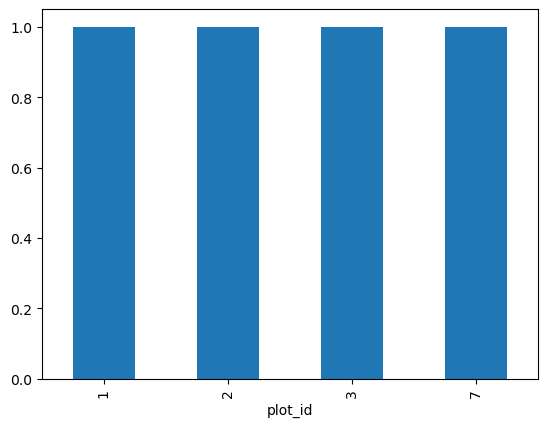

In [50]:
%matplotlib inline
merged_inner2.groupby("plot_id")["taxa"].nunique().plot(kind = "bar")